#### Importer les bibiliothèques

In [2]:
#pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ------------------------------------ --- 21.8/24.0 MB 105.9 MB/s eta 0:00:01
   ---------------------------------------  23.9/24.0 MB 107.7 MB/s eta 0:00:01
   ---------------------------------------- 24.0/24.0 MB 42.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   --------------------- ------------------ 24.4/46.2 MB 110.6 MB/s eta 0:00:01
   --------------------------------- ------ 39.1/46.2 MB 88.8 MB/s eta 0:00:01
   ---------------------------------------  46.1/46.2 MB 91.8 MB/s eta 0:00:01
   ---------------------------------------  46.1/46.2 MB 91.8 MB/s eta 0:00:01
   ---------------------------------------  46.1/46.2 MB 91.8 MB/s eta 0:00:01
   ---------------------------------------- 46.2/46.2 MB 40.3 MB/s eta 0:00:00

  Attempting uninstall: scipy

    Found existing installation: scipy 1.15.3

   ---------------------------------------- 0/2 [scipy]
   --------

  You can safely remove it manually.
  You can safely remove it manually.


In [3]:
import pandas as pd
import gensim
import numpy
import scipy

#### Charger le dataset avec les labels. 

C'est la version du dataset où on a suppimé préalablement la valeur 3 comme score qui est neutre et non pertinent pour notre analyse

In [5]:
path = "https://fullstackds-projects-bucket.s3.eu-west-3.amazonaws.com/data/clean_reviews_with_labels.csv"
df = pd.read_csv(path)
df.head()

,firm,date_review,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,...,recommend_score,status,experience,headline_clean,pros_clean,cons_clean,full_text_clean,text,sentiment,label
0,Apple,2008-01-31,5,3.0,5.0,3.0,4.0,4.0,v,v,...,2.0,current,No information,product poeple enjoy buy,people work great not imagine life will produc...,careful job life careful need learn seperate ...,product poeple enjoy buy. people work great no...,product poeple enjoy buy people work great not...,positive,1
1,Apple,2008-02-14,4,4.0,5.0,3.0,4.0,3.0,v,v,...,2.0,current,No information,different job different creative product work,big positive enjoy job apple innovative change...,suppose con hard balance work home life,different job different creative product work....,different job different creative product work ...,positive,1
2,Apple,2008-02-15,5,4.0,5.0,5.0,5.0,5.0,v,v,...,2.0,current,No information,work apple hard job love,work place like apple opportunity change way w...,people apple live bleed edge not know future h...,work apple hard job love. work place like appl...,work apple hard job love work place like apple...,positive,1
3,Apple,2008-04-20,5,5.0,5.0,5.0,4.0,5.0,v,v,...,2.0,current,No information,retail job altogether exciting thrilling life ...,despite fact boil sell product apple make feel...,intensive training mandatory meeting month pos...,retail job altogether exciting thrilling life ...,retail job altogether exciting thrilling life ...,positive,1
4,Apple,2008-04-20,2,3.0,5.0,2.0,3.0,1.0,x,x,...,0.0,former,No information,bad choice,benefit fulltime employee great stock option r...,confidentiality not fart get reprimand way fee...,bad choice. benefit fulltime employee great st...,bad choice benefit fulltime employee great sto...,negative,0


#### Création des nouvelles colonnes avec des listes des tokens pour appliquer Word2Vec

In [6]:
def simple_tokenize(text):
    if pd.isnull(text):
        return []
    return text.lower().split()

df['proceeded_pros_clean'] = df['pros_clean'].apply(simple_tokenize)
df['proceeded_cons_clean'] = df['cons_clean'].apply(simple_tokenize)
df['proceeded_headline'] = df['headline_clean'].apply(simple_tokenize)

In [7]:
df.head()

,firm,date_review,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,...,headline_clean,pros_clean,cons_clean,full_text_clean,text,sentiment,label,proceeded_pros_clean,proceeded_cons_clean,proceeded_headline
0,Apple,2008-01-31,5,3.0,5.0,3.0,4.0,4.0,v,v,...,product poeple enjoy buy,people work great not imagine life will produc...,careful job life careful need learn seperate ...,product poeple enjoy buy. people work great no...,product poeple enjoy buy people work great not...,positive,1,"[people, work, great, not, imagine, life, will...","[careful, job, life, careful, need, learn, sep...","[product, poeple, enjoy, buy]"
1,Apple,2008-02-14,4,4.0,5.0,3.0,4.0,3.0,v,v,...,different job different creative product work,big positive enjoy job apple innovative change...,suppose con hard balance work home life,different job different creative product work....,different job different creative product work ...,positive,1,"[big, positive, enjoy, job, apple, innovative,...","[suppose, con, hard, balance, work, home, life]","[different, job, different, creative, product,..."
2,Apple,2008-02-15,5,4.0,5.0,5.0,5.0,5.0,v,v,...,work apple hard job love,work place like apple opportunity change way w...,people apple live bleed edge not know future h...,work apple hard job love. work place like appl...,work apple hard job love work place like apple...,positive,1,"[work, place, like, apple, opportunity, change...","[people, apple, live, bleed, edge, not, know, ...","[work, apple, hard, job, love]"
3,Apple,2008-04-20,5,5.0,5.0,5.0,4.0,5.0,v,v,...,retail job altogether exciting thrilling life ...,despite fact boil sell product apple make feel...,intensive training mandatory meeting month pos...,retail job altogether exciting thrilling life ...,retail job altogether exciting thrilling life ...,positive,1,"[despite, fact, boil, sell, product, apple, ma...","[intensive, training, mandatory, meeting, mont...","[retail, job, altogether, exciting, thrilling,..."
4,Apple,2008-04-20,2,3.0,5.0,2.0,3.0,1.0,x,x,...,bad choice,benefit fulltime employee great stock option r...,confidentiality not fart get reprimand way fee...,bad choice. benefit fulltime employee great st...,bad choice benefit fulltime employee great sto...,negative,0,"[benefit, fulltime, employee, great, stock, op...","[confidentiality, not, fart, get, reprimand, w...","[bad, choice]"


#### S’assurer que les colonnes soient bien des listes de tokens

In [8]:
print(df[['proceeded_pros_clean', 'proceeded_cons_clean', 'proceeded_headline']].head())

                                proceeded_pros_clean  \
0  [people, work, great, not, imagine, life, will...   
1  [big, positive, enjoy, job, apple, innovative,...   
2  [work, place, like, apple, opportunity, change...   
3  [despite, fact, boil, sell, product, apple, ma...   
4  [benefit, fulltime, employee, great, stock, op...   

                                proceeded_cons_clean  \
0  [careful, job, life, careful, need, learn, sep...   
1    [suppose, con, hard, balance, work, home, life]   
2  [people, apple, live, bleed, edge, not, know, ...   
3  [intensive, training, mandatory, meeting, mont...   
4  [confidentiality, not, fart, get, reprimand, w...   

                                  proceeded_headline  
0                      [product, poeple, enjoy, buy]  
1  [different, job, different, creative, product,...  
2                     [work, apple, hard, job, love]  
3  [retail, job, altogether, exciting, thrilling,...  
4                                      [bad, choice

#### Fusionner toutes les observations en une seule liste de « phrases », chacune étant une liste de tokens.
Dans ce contexte, une “phrase” est simplement une liste de tokens extraits d'un avis, utilisée comme unité de contexte pour entraîner le modèle Word2Vec

In [9]:
sentences = []

for col in ['proceeded_pros_clean', 'proceeded_cons_clean', 'proceeded_headline']:
    sentences.extend(df[col].tolist())

#### Entraîner le modèle Word2Vec
**Critères pour choisir la taille des vecteurs**

*Corpus petit ou spécialisé :* 
- Privilégie des dimensions d'embeddings plus faibles (par exemple, 50 à 100). 
- Cela limite le risque de surapprentissage et réduit le temps de calcul.

In [10]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=sentences,
    vector_size=100,   # taille des vecteurs
    window=5,          # fenêtre de contexte
    min_count=1,       # inclure tous les mots même très rares
    workers=4,         # nombre de threads
    sg=0               # 0 = CBOW(Continuous Bag of Words), 1 = Skip-gram
)

In [11]:
# visualiser la représentation vectorielle (embedding) du mot 'salary'
vector = model.wv['salary']
print(vector)

[ 2.4432549e+00 -2.0221825e+00 -1.3560618e-01 -8.6646640e-01
 -1.3835100e+00  4.3112275e-01 -4.7621068e-01  1.0734749e-01
 -3.7830171e-01  2.4848964e+00 -5.3213543e-01 -1.2292681e-01
  8.2883537e-01 -1.2111223e+00  2.3598136e-01  2.0008316e+00
 -1.1659997e+00 -1.0879678e+00 -6.7030513e-01 -1.2538604e+00
 -3.3029652e+00 -1.1904300e+00  1.0964540e+00 -1.6987020e+00
 -1.9407114e+00  6.6083485e-01 -3.9602515e-01 -1.0725076e+00
 -1.0610389e+00  1.2352525e+00 -2.3874428e+00  1.4845977e-02
  1.2611324e+00 -6.0531062e-01 -1.9086687e-01 -1.3315423e-01
  2.8764886e-01 -1.2400841e+00 -4.8467284e-01 -1.4587778e+00
 -2.1211267e-02 -5.7487947e-01 -7.6333022e-01  2.1549339e+00
 -9.2417240e-01 -1.9779232e+00 -3.3879178e+00  6.9691288e-01
 -2.2131273e-01 -1.2112975e+00 -3.6075848e-01  7.6060271e-01
 -1.7124544e+00  1.7824906e+00  5.2685194e-02 -7.5598276e-01
  5.2816677e-01 -8.4593773e-01  7.5884469e-02 -8.5173631e-01
 -7.8186083e-01  2.6374748e+00 -1.3300335e+00  2.4502094e-01
  2.4841619e-01  1.93376

In [12]:
# trouver des mots similaires
print(model.wv.most_similar('salary'))

[('pay', 0.845918595790863), ('compensation', 0.8354911804199219), ('remuneration', 0.6668840646743774), ('payment', 0.6387718319892883), ('wage', 0.6325346231460571), ('comp', 0.6194362640380859), ('exceedsoutstande', 0.5961186289787292), ('payout', 0.5864468812942505), ('package', 0.5608753561973572), ('percentage', 0.5571863055229187)]


In [13]:
vector = model.wv['promotion']
print(vector)

[ 0.08415753  2.142417   -0.8142043  -0.78095716 -2.4555256  -2.924301
 -2.807391   -3.0138693   0.43263003  2.1081529  -0.38112178 -0.41880858
  0.32601625 -0.50722665 -1.1420476  -0.11513449 -1.4846752  -0.9190615
  2.5624564  -0.6042143  -1.9760362   1.1052543   0.11301054  0.9528488
 -1.103598   -0.61371934 -1.2607893   0.33120865 -0.314818   -1.3937724
 -1.5722756  -0.70214045 -1.4998775  -0.97740465  0.4298069  -0.613282
 -2.0337124  -0.2946315  -1.3722492  -2.1974657  -0.09748418 -0.1948579
  0.4587164   0.73086643  1.4222224  -0.32427913 -3.2721236  -0.9853386
 -0.7706153  -0.09162452 -0.22462057 -0.66200894  0.6090267   1.1700199
 -1.50721    -0.7646538  -1.6499879   0.64592606 -2.190048   -0.26808625
 -0.92759025  1.1509215  -0.8519072  -1.8500873  -0.31462964 -0.7499694
  1.16517    -1.9909618  -3.966643    1.0982141   1.4286939   1.1907442
  3.6369684  -0.06153889  0.43252078  1.7572724   0.76205647 -1.0307938
 -0.31634974  1.0218639   1.9164778  -2.4820004   0.23997065 -0.

In [14]:
print(model.wv.most_similar('promotion'))

[('promote', 0.6648901700973511), ('merit', 0.6422820687294006), ('promotional', 0.5875521898269653), ('progression', 0.5873980522155762), ('advancement', 0.5640665888786316), ('seniority', 0.5485690832138062), ('rise', 0.5467908382415771), ('promo', 0.5465466380119324), ('appraisal', 0.5412082672119141), ('merithorical', 0.5371332168579102)]


In [15]:
vector = model.wv['openspace']
print(vector)

[ 0.03269043 -0.0300607  -0.01951111 -0.00325087 -0.01131207 -0.01047929
  0.05756894  0.03831246  0.01643873 -0.01218664 -0.01059695 -0.02530856
 -0.03821304  0.03639555  0.01274756 -0.03102802  0.02001392 -0.0420651
  0.00013888  0.00681522  0.04737734 -0.02727074  0.01399137 -0.05085717
  0.07506089 -0.00232396 -0.03043276 -0.00200663  0.00256621  0.08741472
  0.0565184   0.04521853 -0.03776196  0.02747093  0.00098187 -0.02994512
 -0.00743504 -0.04492245 -0.00428779  0.02284149  0.01875305  0.00227766
 -0.0136915  -0.01061621  0.04504808 -0.0131872  -0.05653032  0.02937014
  0.00576259  0.08096526 -0.01506083 -0.01488401  0.03803667 -0.01573985
 -0.03527632  0.02105864  0.01746006 -0.02320452 -0.01563718 -0.05251569
  0.03769532  0.03331826 -0.04125196 -0.06945334 -0.00946826  0.01398554
 -0.0026695   0.01161275 -0.00280021  0.03436955 -0.0245811   0.0553286
  0.02228302 -0.05925535  0.01534467 -0.03822805 -0.02615326  0.03219833
 -0.04355001 -0.00468762 -0.01079982  0.0085331  -0.0

In [16]:
print(model.wv.most_similar('openspace'))

[('geos', 0.5999029278755188), ('travelie', 0.5947437882423401), ('goodteam', 0.5902709364891052), ('peopleniche', 0.5824378132820129), ('hectik', 0.5822166800498962), ('canary', 0.5710341930389404), ('wellequipped', 0.5671417117118835), ('bland', 0.5657095313072205), ('overcrowded', 0.5652052164077759), ('dusty', 0.565085768699646)]


In [17]:
vector = model.wv['life']
print(vector)

[ 0.9976196   1.9241831   0.7314891  -1.9076279   2.4992812  -0.27713102
  1.2696157   1.0689279   1.5231857   1.3625985  -0.24042475 -1.6649843
  1.2482471   1.50998    -1.2746983   3.0554833   0.18900432 -0.52132916
  2.0048177   0.9367272   0.5383215  -1.8264337   0.98392     1.168417
 -3.1207685   0.23795927  0.9180417   0.04481432 -0.49310398  0.3582776
 -0.49838936  0.19375789 -1.2046704  -0.32998845 -0.53138417 -0.0332341
  2.28883     0.53715724  0.62430674  0.93161935 -0.28448662  2.324829
  1.00496     1.6750727   0.5287142   2.1641254  -0.97760963  3.7536905
 -0.37140876  0.39427748  1.0011196   1.1532828  -0.30431223 -1.7986403
 -0.02537136  2.159727    0.72338724  2.1770952  -0.50542754  0.16247217
 -0.6931378  -1.2166908   0.46664274  2.0661256   2.9946532  -0.44935688
 -1.4846296  -1.6242188  -0.7164519  -0.21034802  1.9373643  -1.2251903
  3.3346367   0.4286882  -1.4045968  -0.57189023 -0.31450233 -1.0161555
  2.3329387   0.52461773 -0.36089137 -0.7306784  -2.5089111  -

In [18]:
print(model.wv.most_similar('life'))

[('worklife', 0.7977616786956787), ('lifework', 0.5910425782203674), ('workfamily', 0.5491830706596375), ('cothey', 0.5381647944450378), ('lfie', 0.5161566138267517), ('wl', 0.50063556432724), ('departmentno', 0.4790772497653961), ('worklift', 0.46317189931869507), ('selfpromoting', 0.4631548523902893), ('youngstersfresher', 0.45960623025894165)]


In [19]:
vector = model.wv['quit']
print(vector)

[ 0.58820975 -0.42846692 -0.8685945   0.5152662  -0.8417228   0.34128138
  0.7336659  -1.4117006  -0.88284785  1.9771823   0.04153465  2.3611789
  1.2436837  -0.4307641   0.09258809 -0.04337107  0.86838216  0.8933314
  0.35744113  0.52830076 -0.62936413 -1.0429846  -0.7797215   0.5896815
 -0.01358272 -1.030149   -0.5639618   1.7278073  -0.35512522 -0.9405693
  0.7524362  -1.0440792   1.3141911  -0.46056026 -0.5100048  -0.47063723
 -0.18190713  0.02313937  2.0977411  -1.0432663  -0.68395495 -1.0181242
  0.36575013  0.06798042  0.5778561   1.1032993   0.15611142 -1.6651816
 -0.9279991   1.1602268   0.45397854  0.72015685 -0.37605995 -1.2268578
  0.7605944   0.37155768 -0.6265489   0.63691884 -1.3016303  -0.8191059
 -0.72711843  1.3348218  -0.58255875  0.8931174   0.91002554 -0.17491378
 -1.2097853  -0.9808089  -0.49328965  0.44095302  1.334741   -1.0289843
  0.1695829  -0.54777694 -0.80618167  0.2431615   1.0931693  -0.5055832
 -0.35112193  0.9093796  -1.4120877  -1.8797373   1.4338803  

In [20]:
print(model.wv.most_similar('quit'))

[('resign', 0.776211678981781), ('fire', 0.753110408782959), ('soon', 0.7302823662757874), ('retire', 0.7267129421234131), ('leave', 0.7161263227462769), ('let', 0.7063245177268982), ('lay', 0.6954552531242371), ('terminate', 0.6861270666122437), ('realize', 0.6818763613700867), ('wonder', 0.6715676188468933)]


In [21]:
model.save("word2vec_reviews.model")

#### Charger le modèle entrainé Word2Vec

In [24]:
model = Word2Vec.load("word2vec_reviews.model")

#### Vecteur moyen par phrase à partir des embeddings Word2Vec

Pour chaque texte (dans les colonnes pros, cons, headline), on calcule un vecteur moyen en combinant les vecteurs des mots individuels issus du modèle Word2Vec entraîné.
Cette opération permet de représenter chaque avis comme un vecteur de taille fixe (100 dimensions), prêt à être utilisé dans un modèle de classification.


In [25]:
import numpy as np
def get_sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

df['vec_pros'] = df['proceeded_pros_clean'].apply(lambda x: get_sentence_vector(x, model))
df['vec_cons'] = df['proceeded_cons_clean'].apply(lambda x: get_sentence_vector(x, model))
df['vec_headline'] = df['proceeded_headline'].apply(lambda x: get_sentence_vector(x, model))

#### Fusion des représentations textuelles

Pour chaque observation, on concatène les vecteurs issus des colonnes pros, cons et headline, afin d’obtenir une seule représentation vectorielle combinée (de dimension 300).
Cela permet d’intégrer l’information complète de l’avis dans un seul vecteur utilisable pour l’apprentissage supervisé.

In [26]:
# Concaténer les vecteurs des trois colonnes
df['vector'] = df.apply(
    lambda row: np.concatenate([row['vec_pros'], row['vec_cons'], row['vec_headline']]),
    axis=1
)

#### Préparer les données pour la régression logistique = créer X (features) et y (cible)

Transformer le vecteur combiné ('pro's, 'cons', 'headline') en une seule matrice de caractéristiques X. Chaque ligne de X correspond à un vecteur de caractéristiques complet pour un exemple.

Extraire les étiquettes cibles y à partir de la colonne 'labels', qui contiennent les classes binaires (0 ou 1) pour la tâche de classification.

Cette préparation permet de fournir les entrées (X) et les sorties (y) nécessaires pour entraîner un modèle de classification, comme une régression logistique.

In [28]:
# Empiler verticalement les vecteurs de caractéristiques pour former une matrice 2D
X = np.vstack(df['vector'].values)

# Extraire les étiquettes cibles sous forme de tableau numpy
y = df['label'].values

In [29]:
# Diviser en train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Normaliser les données
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# entrainer la regression logistique
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# Évaluer le modèle
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8774535809018568
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.53      0.62      9947
           1       0.90      0.96      0.93     42833

    accuracy                           0.88     52780
   macro avg       0.82      0.74      0.77     52780
weighted avg       0.87      0.88      0.87     52780



**Classe 0 (NEGATIVE) :**
- Précision 0.75 : 75% des éléments prédits comme "0" sont effectivement des "0".
- Rappel 0.53 : Le modèle retrouve 53% des vrais "0". 
- F1-score 0.62 : Moyenne harmonique entre précision et rappel. 
- Support 9947 : Nombre de vrais exemples de la classe 0.

**Classe 1 (POSITIVE) :**
- Précision 0.90 : 90% des éléments prédits comme "1" sont effectivement des "1".
- Rappel 0.96 : Le modèle retrouve 96% des vrais "1".
- F1-score 0.93 : Excellente performance sur cette classe.
- Support 42833 : Nombre de vrais exemples de la classe 1.

**Interprétation**
- Le modèle est très performant sur la classe majoritaire (1), mais a plus de mal à détecter la classe minoritaire (0).
- Le rappel de la classe 0 est faible (0.53) : le modèle "rate" presque la moitié des vrais exemples de cette classe.
- Déséquilibre des classes : la classe 1 est beaucoup plus représentée dans vos données (4 fois plus d'exemples que la classe 0), 
ce qui peut expliquer les performances déséquilibrées.

**Résumé**
- Bonne accuracy globale (87%)
- Excellente performance sur la classe majoritaire
- Performance à améliorer sur la classe minoritaire  - par ex utiliser SMOTE pour ré-échantillonage

In [34]:
from sklearn.metrics import confusion_matrix

# y_test : vraies étiquettes
# y_pred : étiquettes prédites par le modèle
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 5233  4714]
 [ 1754 41079]]


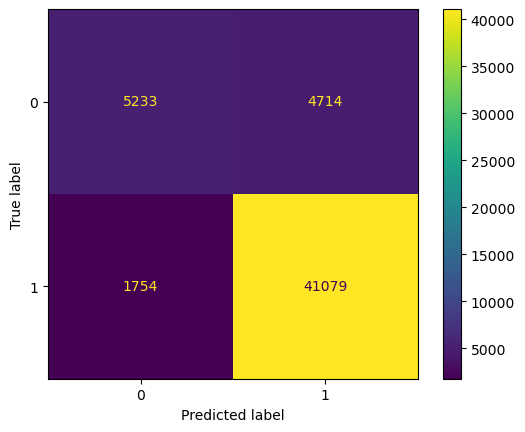

In [35]:
# Affichage graphique
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Tester rééquilibrage des classes avec SMOTE

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Mise en échelle des données rééquilibrées
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)  

# Entrainer le modèle
clf_smote = LogisticRegression(max_iter=1000)
clf_smote.fit(X_train_res_scaled, y_train_res)

# Evaluer le modèle
y_pred_smote = clf_smote.predict(X_test_scaled)
print("Avec SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Classification report:\n", classification_report(y_test, y_pred_smote))

Avec SMOTE:
Accuracy: 0.8224137931034483
Classification report:
               precision    recall  f1-score   support

           0       0.52      0.81      0.63      9947
           1       0.95      0.83      0.88     42833

    accuracy                           0.82     52780
   macro avg       0.73      0.82      0.76     52780
weighted avg       0.87      0.82      0.84     52780



[[ 8009  1938]
 [ 7435 35398]]


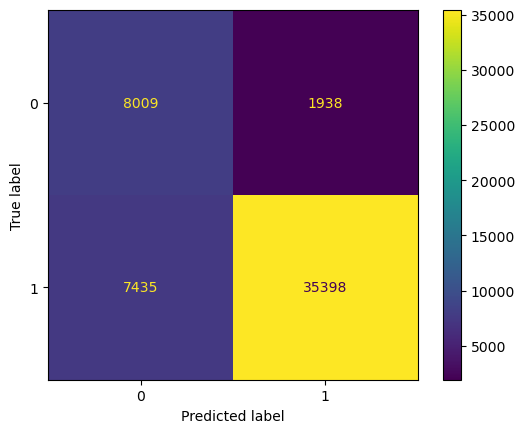

In [37]:
cm = confusion_matrix(y_test, y_pred_smote)
print(cm)

# Affichage graphique
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Conclusion (avec SMOTE) :**
L'application de la méthode SMOTE a permis de rééquilibrer la base d'entraînement, ce qui a conduit à une amélioration significative de la détection de la classe minoritaire (0).

**Le rappel (recall)** pour la classe 0 est passé de **0.53** à **0.81**, indiquant que le modèle rate beaucoup moins de cas de cette classe.

En contrepartie, **la précision globale (accuracy)** a légèrement **diminué (de 0.88 à 0.82)**, ce qui est un compromis classique lorsqu'on corrige un déséquilibre.

Le modèle est devenu **plus équilibré** dans ses prédictions, comme le montre l’amélioration des scores macro average, ce qui est essentiel si les deux classes sont d’importance comparable dans le cas d’usage.

#### Tester regression logistique avec GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

# Définir le modèle de base
logreg = LogisticRegression(max_iter=1000)

# Définir la grille de paramètres
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2']    
}

# Lancer la recherche
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)# n_jobs=-1 - parallelisation maximale(utiliser tous les cœurs du processeur)
grid_search.fit(X_train_res_scaled, y_train_res)

# Meilleurs paramètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Évaluer le modèle optimisé
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

Meilleurs hyperparamètres : {'C': 0.01, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.52      0.81      0.63      9947
           1       0.95      0.83      0.88     42833

    accuracy                           0.82     52780
   macro avg       0.73      0.82      0.76     52780
weighted avg       0.87      0.82      0.84     52780



GridSearchCV n’a pas permis d'améliorer les performances ici, car le modèle initial avec SMOTE était déjà bien régularisé par défaut (C=1).

#### Conclusion
Le modèle basé sur TF-IDF combiné avec la régression logistique a donné de meilleurs résultats, même sans SMOTE, comparé à la combinaison Word2Vec + SMOTE. Explications possibles :

- TF-IDF capte mieux les mots discriminants :
TF-IDF conserve l'information de fréquence des mots dans chaque document, ce qui aide la régression logistique à identifier des termes fortement liés au sentiment (positif ou négatif).

- Word2Vec lisse trop l'information :
Les vecteurs Word2Vec sont moyennés sur l’ensemble du texte, ce qui réduit la spécificité des exemples. Cela peut rendre la tâche de classification plus difficile, surtout avec une méthode linéaire.

- Plus de dimensions utiles avec TF-IDF :
TF-IDF crée des vecteurs très dimensionnels, ce qui donne à la régression logistique plus de "caractéristiques" pour séparer les classes.

#### La prochaine étape - tester le modèle transformer type Bert fine-tuné